In [153]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [154]:
import warnings

warnings.filterwarnings('ignore')

In [155]:
data = pd.read_csv('dataset.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [156]:
display(data.dtypes, data.shape, data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

(7043, 21)

None

In [157]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [158]:
data.duplicated().sum()

0

In [159]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [160]:
data.columns = [a.lower() for a in data.columns]
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [161]:
data.drop(['customerid'], axis = 1, inplace= True)

In [162]:
data['totalcharges'].value_counts()

totalcharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [163]:
data['totalcharges'].unique()
data['totalcharges'] = data['totalcharges'].replace(' ', np.nan).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [164]:
data.dropna(inplace=True)

In [165]:
data.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [166]:
display(data['onlinesecurity'].value_counts(),
data['onlinebackup'].value_counts(),
data['deviceprotection'].value_counts(),
data['techsupport'].value_counts(),
data['streamingtv'].value_counts(),
data['streamingmovies'].value_counts())

onlinesecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

onlinebackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

deviceprotection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

techsupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

streamingtv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

streamingmovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [167]:
replace_cols = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

for i in replace_cols :
    data[i] = data[i].replace('No internet service', 'No')

In [168]:
display(data['onlinesecurity'].value_counts(),
data['onlinebackup'].value_counts(),
data['deviceprotection'].value_counts(),
data['techsupport'].value_counts(),
data['streamingtv'].value_counts(),
data['streamingmovies'].value_counts())

onlinesecurity
No     5017
Yes    2015
Name: count, dtype: int64

onlinebackup
No     4607
Yes    2425
Name: count, dtype: int64

deviceprotection
No     4614
Yes    2418
Name: count, dtype: int64

techsupport
No     4992
Yes    2040
Name: count, dtype: int64

streamingtv
No     4329
Yes    2703
Name: count, dtype: int64

streamingmovies
No     4301
Yes    2731
Name: count, dtype: int64

In [169]:
data['seniorcitizen'] = data['seniorcitizen'].replace({1: 'Yes', 0: 'No'})
data['seniorcitizen'].value_counts()

seniorcitizen
No     5890
Yes    1142
Name: count, dtype: int64

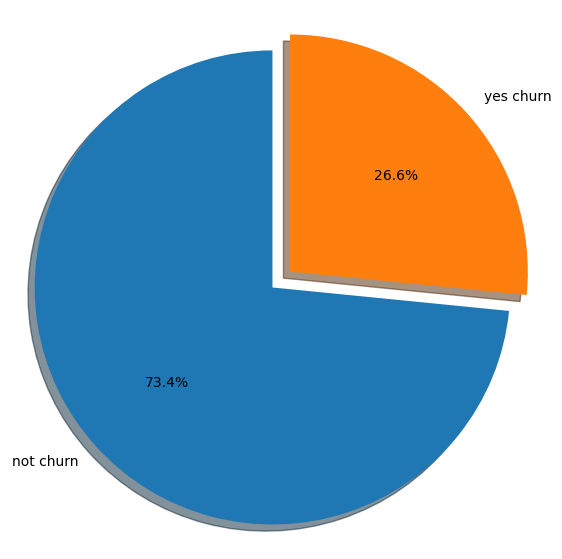

In [170]:
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(data['churn'].value_counts(), labels=('not churn', 'yes churn'), explode = [0.1,0], autopct='%1.1f%%', shadow= True, startangle = 90, labeldistance = 1.1)
plt.axis('equal')
plt.show()


In [171]:
def plot_cat(data, feature, xlabel_rotation = 0):
    fig, ax = plt.subplots(1, 2, figsize = (14,4))
    ax[0].set(xlabel = f"{feature}", ylabel = 'Number Of Changes')
    ax[1].set(xlabel = f"{feature}", ylabel = 'Number Of Changes')

    data[data.churn == 'No'][feature].value_counts().plot(kind='bar', ax = ax[0], rot = xlabel_rotation).set_title('Non Churn')
    data[data.churn == 'Yes'][feature].value_counts().plot(kind='bar', ax = ax[1], rot = xlabel_rotation).set_title('Churn')

    fig.suptitle(f'{feature} distribution in customer attrition', y = 1.02, size = 16, weight = 'bold')

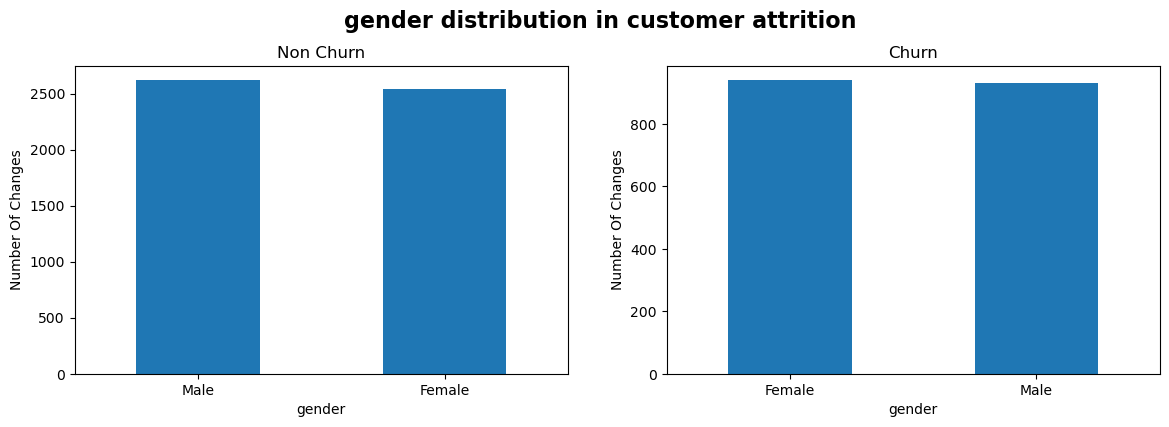

In [172]:
plot_cat(data, 'gender')

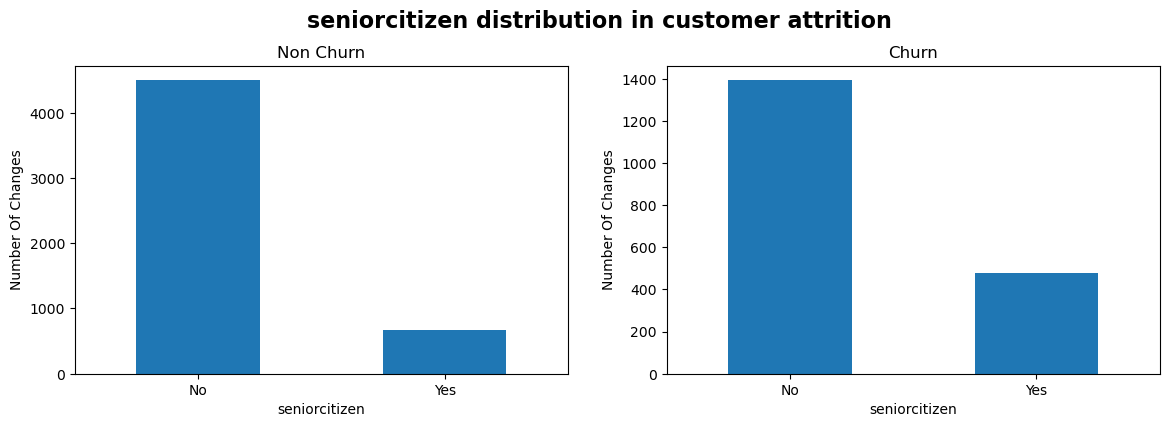

In [173]:
plot_cat(data, 'seniorcitizen')

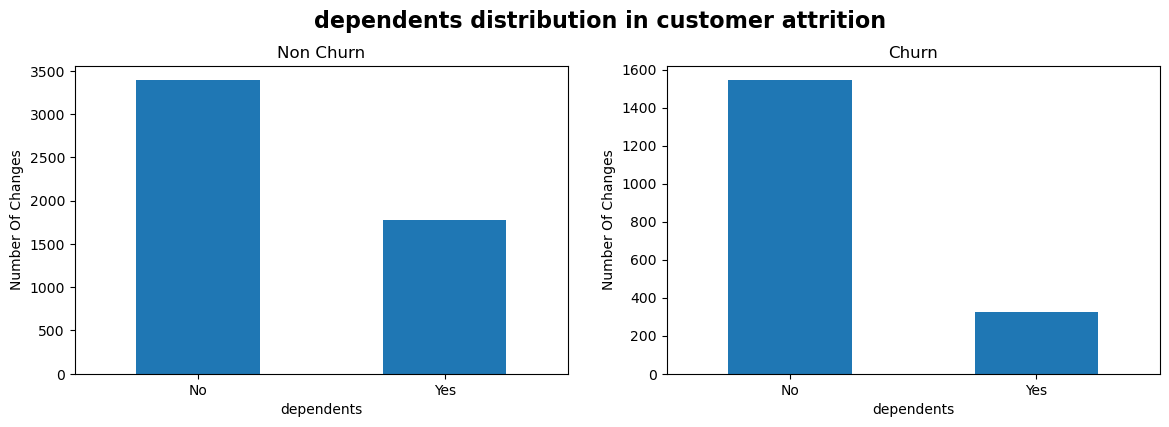

In [174]:
plot_cat(data, 'dependents')

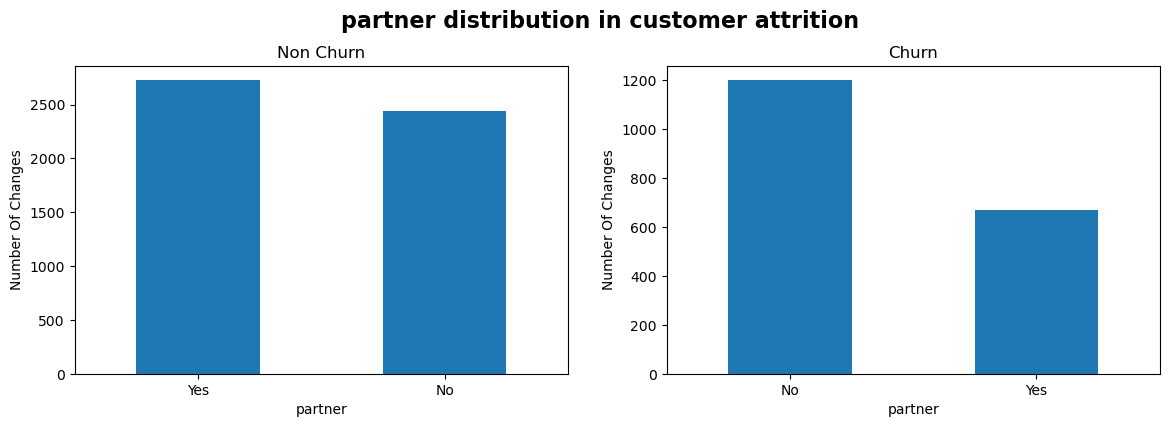

In [175]:
plot_cat(data, 'partner')

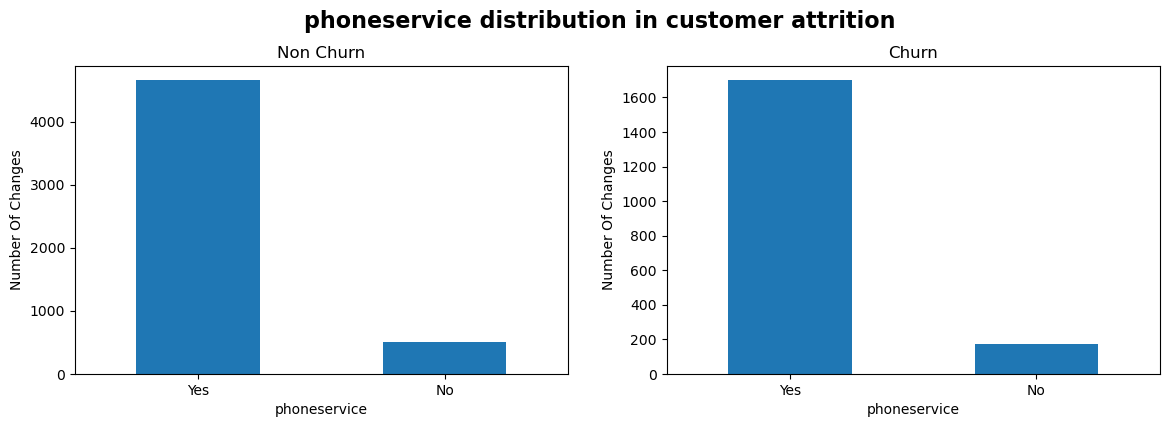

In [176]:
plot_cat(data, 'phoneservice')

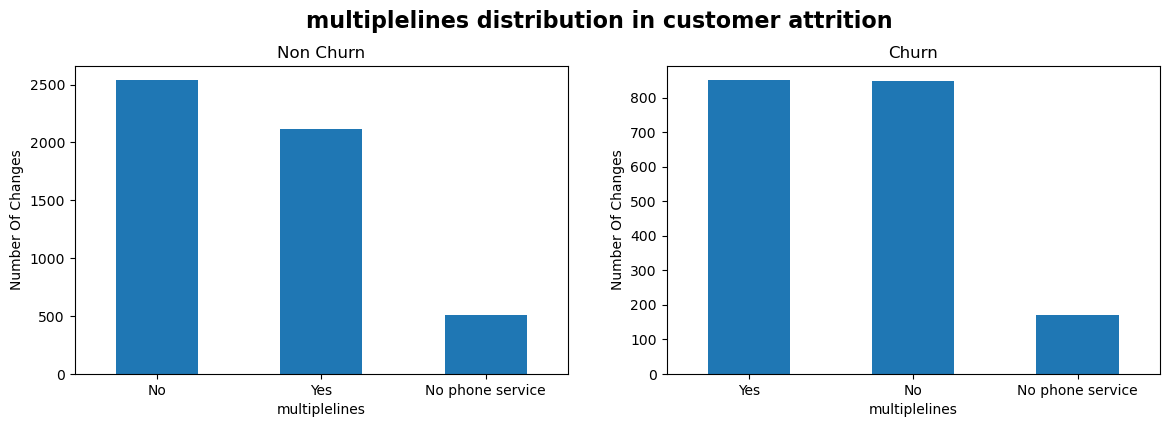

In [177]:
plot_cat(data, 'multiplelines')

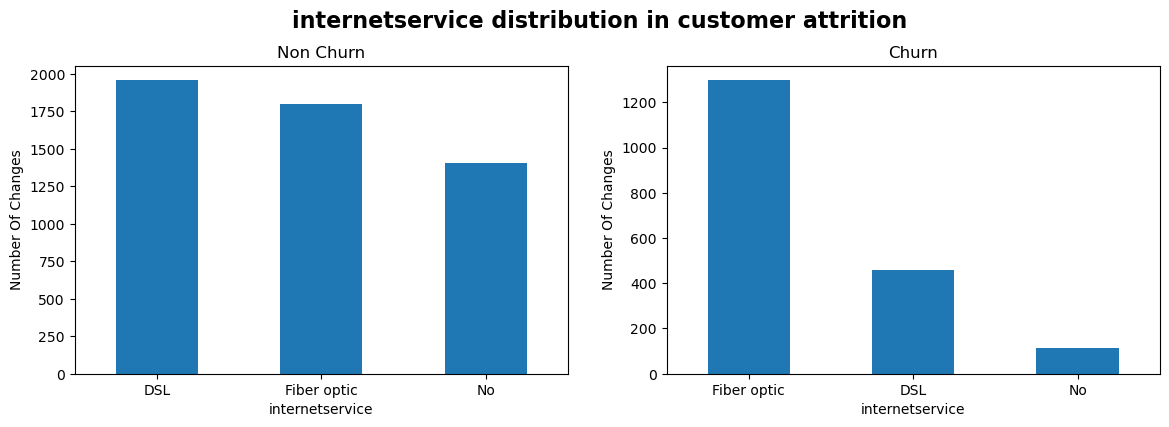

In [178]:
plot_cat(data, 'internetservice')

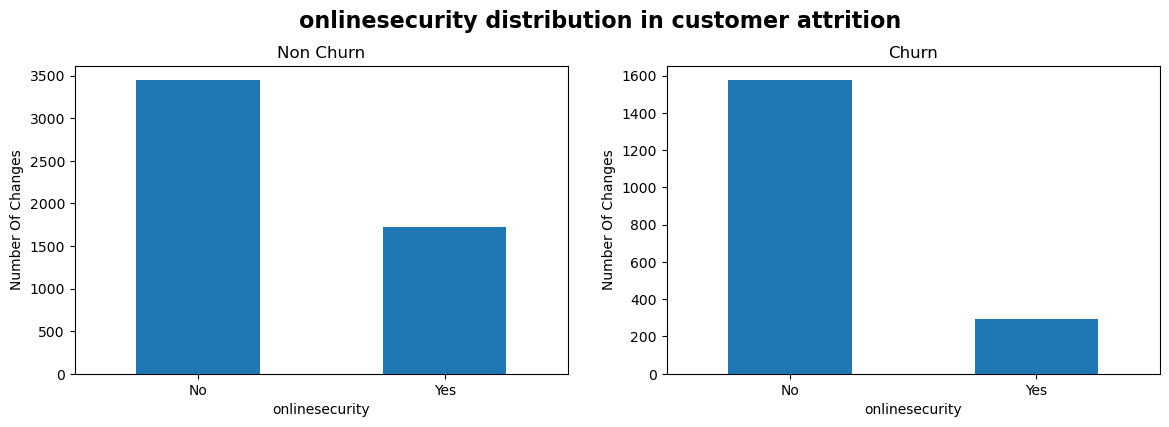

In [179]:
plot_cat(data, 'onlinesecurity')

In [180]:
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

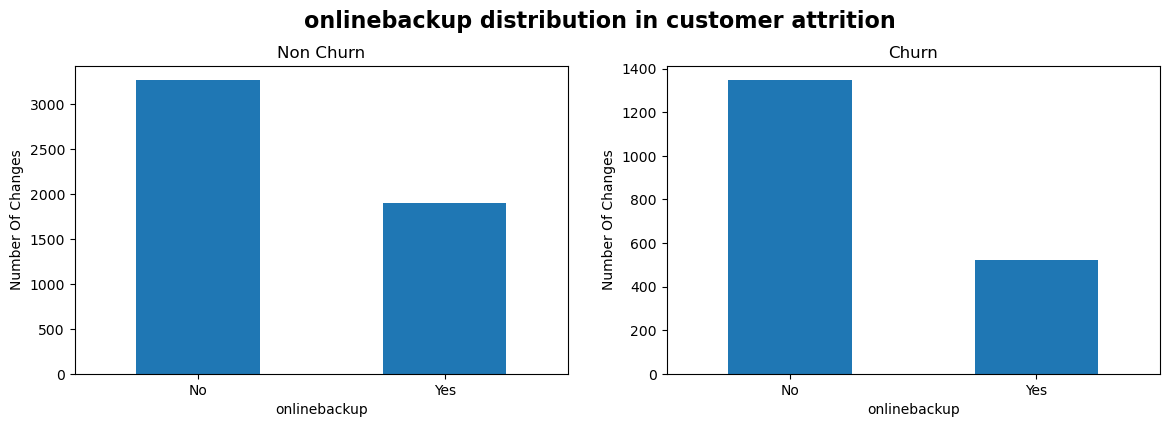

In [181]:
plot_cat(data, 'onlinebackup')

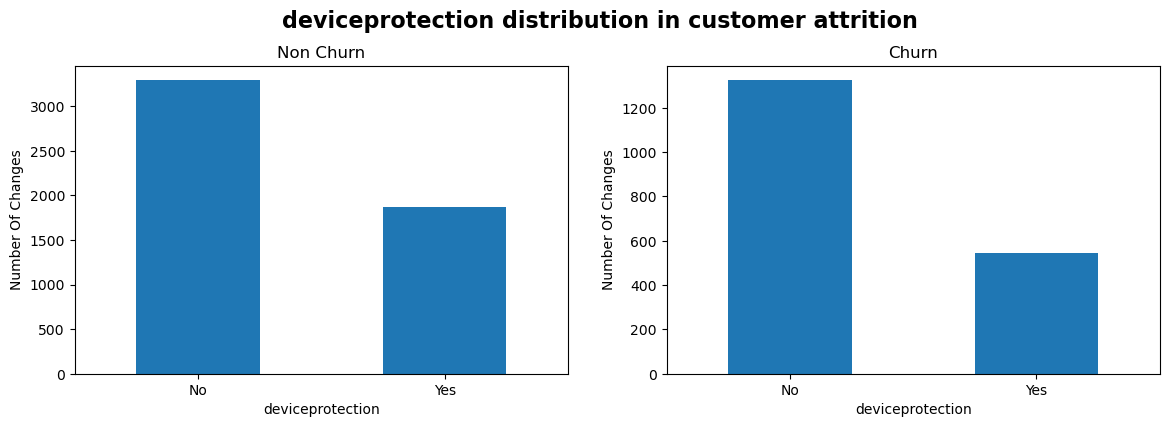

In [182]:
plot_cat(data, 'deviceprotection')

In [183]:
# for i in data.columns:
#     plot_cat(data, i)

In [184]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']

In [185]:
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

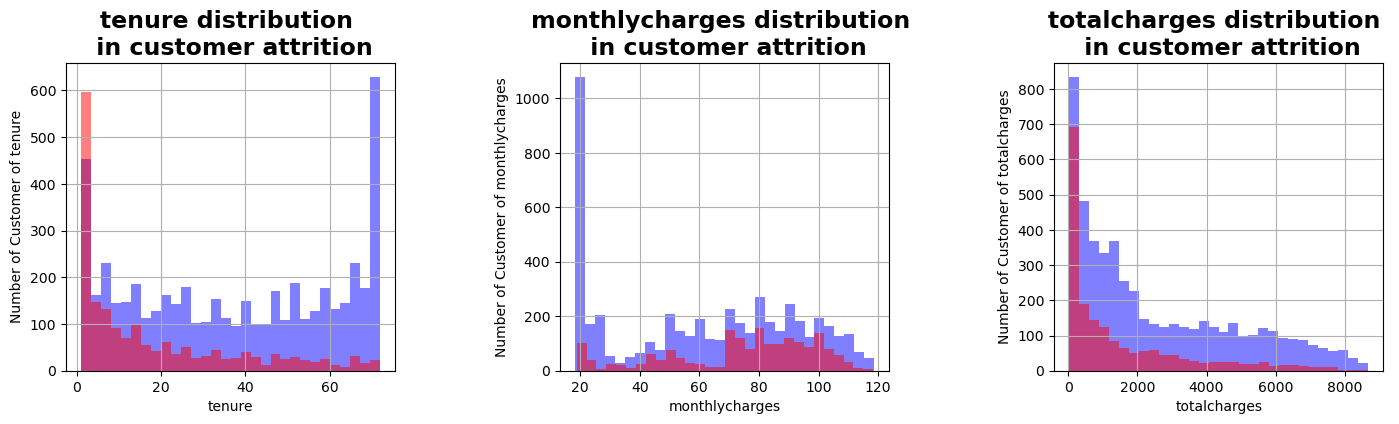

In [186]:
fig, ax = plt.subplots(1, len(numerical_features), figsize = (17,4))
fig.subplots_adjust(wspace=.5)

for feature,i in zip(numerical_features,range(len(numerical_features))):
    ax[i].set(xlabel = f'{feature}', ylabel = f'Number of Customer of {feature}')
    ax[i].set_title(f'{feature} distribution \n in customer attrition', size = 17, weight = 'bold')
    data[data.churn == 'No'][feature].hist(bins = 30, color="blue", alpha = 0.5, ax = ax[i])
    data[data.churn == 'Yes'][feature].hist(bins = 30, color="red", alpha = 0.5, ax = ax[i])

In [187]:
def find_outliers(col):
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z >3, True, False)
    return pd.Series(idx_outliers, index=col.index)

In [188]:
l = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = l.fit_transform(data[i])

In [189]:
data.corr()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
seniorcitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
phoneservice,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
multiplelines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.131228,0.226824,0.231898,0.134212,0.275113,0.280330,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
internetservice,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
onlinesecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.131228,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
onlinebackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.226824,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


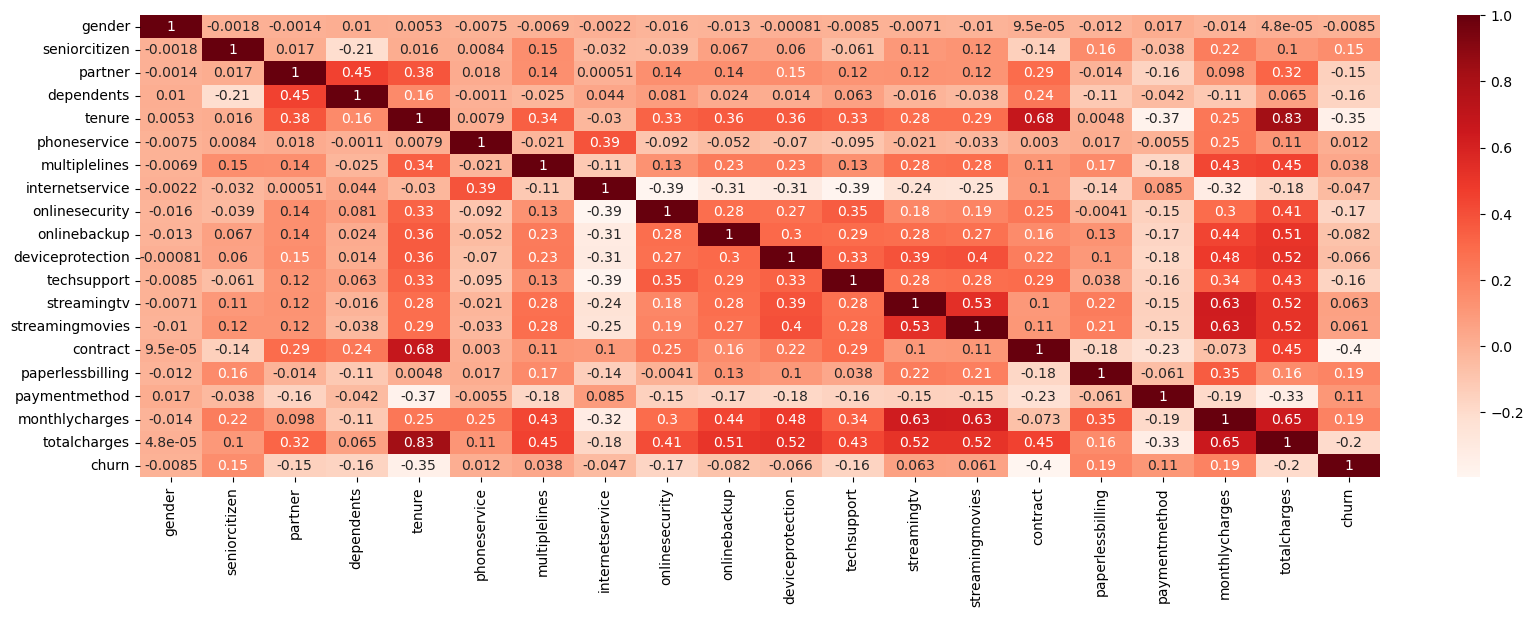

In [190]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(data.corr(), annot = True, cmap = 'Reds')
plt.show()

In [191]:
correlations = data.corr()['churn']

sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations

churn               1.000000
monthlycharges      0.192858
paperlessbilling    0.191454
seniorcitizen       0.150541
paymentmethod       0.107852
streamingtv         0.063254
streamingmovies     0.060860
multiplelines       0.038043
phoneservice        0.011691
gender             -0.008545
internetservice    -0.047097
deviceprotection   -0.066193
onlinebackup       -0.082307
partner            -0.149982
dependents         -0.163128
techsupport        -0.164716
onlinesecurity     -0.171270
totalcharges       -0.199484
tenure             -0.354049
contract           -0.396150
Name: churn, dtype: float64

In [192]:
selected_columns = ['monthlycharges', 'paperlessbilling', 'seniorcitizen', 'paymentmethod', 'contract', 'tenure', 'totalcharges', 'onlinesecurity', 'techsupport', 'dependents', 'churn']

new_df = data[selected_columns]
new_df.head()

,monthlycharges,paperlessbilling,seniorcitizen,paymentmethod,contract,tenure,totalcharges,onlinesecurity,techsupport,dependents,churn
0,29.85,1,0,2,0,1,29.85,0,0,0,0
1,56.95,0,0,3,1,34,1889.50,1,0,0,0
2,53.85,1,0,3,0,2,108.15,1,0,0,1
3,42.30,0,0,0,1,45,1840.75,1,1,0,0
4,70.70,1,0,2,0,2,151.65,0,0,0,1


In [193]:
x = new_df.drop('churn', axis = 1)
y = new_df['churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7032, dtype: int32

In [194]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
xtrain

,monthlycharges,paperlessbilling,seniorcitizen,paymentmethod,contract,tenure,totalcharges,onlinesecurity,techsupport,dependents
4410,94.65,1,0,0,0,16,1461.15,0,0,0
1232,78.30,0,0,2,0,34,2564.30,0,0,1
3183,36.45,1,1,3,0,3,93.70,0,0,0
1453,94.50,1,0,2,0,31,2979.20,0,0,0
1940,71.50,0,0,2,1,63,4576.30,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1235,98.30,1,1,3,1,61,6066.55,0,1,0
4811,46.00,1,0,3,0,4,193.60,0,0,0
2841,25.10,0,0,2,0,3,79.80,0,0,0
6968,74.40,1,1,0,0,22,1692.60,0,0,0


In [195]:
mms = MinMaxScaler(feature_range=(0,1))

xtrain = mms.fit_transform(xtrain)
xtest = mms.fit_transform(xtest)
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

xtrain

,0,1,2,3,4,5,6,7,8,9
0,0.761335,1.0,0.0,0.000000,0.0,0.211268,0.166433,0.0,0.0,0.0
1,0.598406,0.0,0.0,0.666667,0.0,0.464789,0.293730,0.0,0.0,1.0
2,0.181365,1.0,1.0,1.000000,0.0,0.028169,0.008637,0.0,0.0,0.0
3,0.759841,1.0,0.0,0.666667,0.0,0.422535,0.341607,0.0,0.0,0.0
4,0.530643,0.0,0.0,0.666667,0.5,0.873239,0.525903,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5620,0.797708,1.0,1.0,1.000000,0.5,0.845070,0.697869,0.0,1.0,0.0
5621,0.276532,1.0,0.0,1.000000,0.0,0.042254,0.020165,0.0,0.0,0.0
5622,0.068261,0.0,0.0,0.666667,0.0,0.028169,0.007033,0.0,0.0,0.0
5623,0.559542,1.0,1.0,0.000000,0.0,0.295775,0.193141,0.0,0.0,0.0


In [196]:
xtest

,0,1,2,3,4,5,6,7,8,9
0,0.415292,1.0,0.0,0.333333,0.5,0.774648,0.377176,1.0,1.0,0.0
1,0.008496,1.0,0.0,0.000000,0.0,0.380282,0.060668,0.0,0.0,1.0
2,0.013493,0.0,0.0,0.333333,1.0,0.859155,0.143881,0.0,0.0,1.0
3,0.367316,0.0,0.0,0.000000,0.5,0.366197,0.168582,1.0,0.0,0.0
4,0.012994,0.0,0.0,0.666667,0.0,0.267606,0.046090,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1402,0.512744,1.0,0.0,0.333333,0.0,0.464789,0.277028,0.0,0.0,0.0
1403,0.794103,1.0,0.0,0.000000,0.0,0.070423,0.063401,1.0,1.0,0.0
1404,0.620690,1.0,0.0,0.666667,1.0,1.000000,0.659808,1.0,1.0,1.0
1405,0.725137,0.0,0.0,0.666667,0.0,0.450704,0.340348,0.0,0.0,0.0


In [197]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10,50,100,200,300,400,500]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 1)
grid_search.fit(xtrain, ytrain)

print('\n')
print('Hyperparameter terbaik : ', grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Hyperparameter terbaik :  {'n_estimators': 100}


In [198]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(xtrain, ytrain)

y_pred = best_rf_model.predict(xtest)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy pada data validasi : ", accuracy)

Accuracy pada data validasi :  0.7974413646055437


In [199]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67      0.49      0.57       381

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [200]:
confusionMatrix = confusion_matrix(ytest, y_pred)
confusionMatrix

array([[934,  92],
       [193, 188]], dtype=int64)

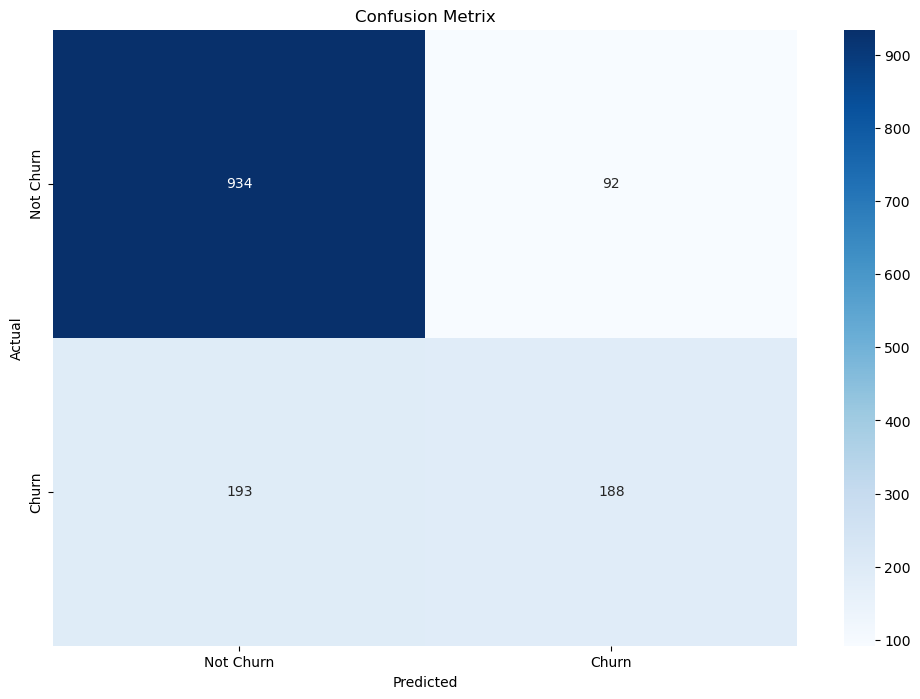

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d", cbar=True, xticklabels=("Not Churn", 'Churn'), yticklabels=("Not Churn", 'Churn'))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix")
plt.show()

In [202]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [203]:
%pip install smote

Note: you may need to restart the kernel to use updated packages.


In [204]:
smote_df = data[selected_columns]
smote_df.head()

,monthlycharges,paperlessbilling,seniorcitizen,paymentmethod,contract,tenure,totalcharges,onlinesecurity,techsupport,dependents,churn
0,29.85,1,0,2,0,1,29.85,0,0,0,0
1,56.95,0,0,3,1,34,1889.50,1,0,0,0
2,53.85,1,0,3,0,2,108.15,1,0,0,1
3,42.30,0,0,0,1,45,1840.75,1,1,0,0
4,70.70,1,0,2,0,2,151.65,0,0,0,1


In [205]:
x = smote_df.drop('churn', axis = 1)
y = smote_df['churn']

In [206]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

In [207]:
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled, test_size=0.2)

In [208]:
mms = MinMaxScaler(feature_range=(0,1))

xtrain = mms.fit_transform(xtrain)
xtest = mms.fit_transform(xtest)
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)

xtrain

,0,1,2,3,4,5,6,7,8,9
0,0.461194,0.0,0.0,0.666667,0.0,0.028169,0.017932,0.0,1.0,0.0
1,0.817413,1.0,0.0,0.000000,0.0,0.408451,0.336655,1.0,0.0,0.0
2,0.014428,1.0,0.0,1.000000,0.0,0.211268,0.037341,0.0,0.0,0.0
3,0.429353,0.0,0.0,0.666667,0.0,0.084507,0.048477,1.0,0.0,0.0
4,0.303483,1.0,0.0,0.000000,0.0,0.169014,0.070921,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6190,0.801990,1.0,0.0,0.333333,0.0,0.436620,0.360847,0.0,0.0,0.0
6191,0.861692,1.0,1.0,0.666667,0.5,0.859155,0.726298,1.0,0.0,0.0
6192,0.024378,0.0,0.0,0.333333,1.0,0.535211,0.085812,0.0,0.0,0.0
6193,0.680100,0.0,0.0,0.000000,1.0,1.000000,0.730637,0.0,1.0,0.0


In [209]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10,50,100,200,300,400,500]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 1)
grid_search.fit(xtrain, ytrain)

print('\n')
print('Hyperparameter terbaik : ', grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits




Hyperparameter terbaik :  {'n_estimators': 300}


In [210]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(xtrain, ytrain)

y_pred = best_rf_model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)

print("accuracy validasi: ", accuracy)

accuracy validasi:  0.7663008392511298


In [211]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1030
           1       0.66      0.64      0.65       519

    accuracy                           0.77      1549
   macro avg       0.74      0.73      0.74      1549
weighted avg       0.76      0.77      0.77      1549



In [212]:
confusionMatrix = confusion_matrix(ytest, y_pred)
confusionMatrix

array([[857, 173],
       [189, 330]], dtype=int64)

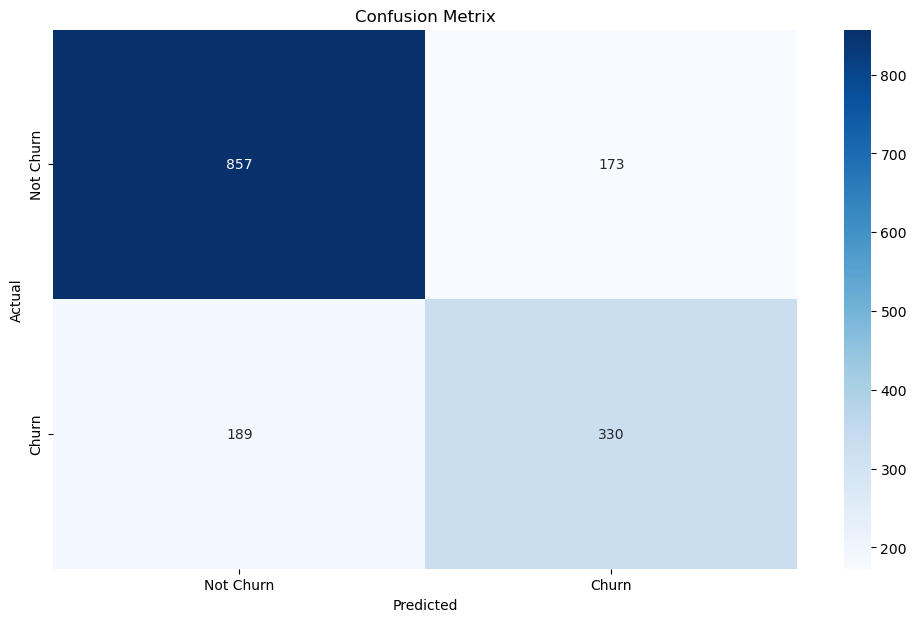

In [213]:
plt.figure(figsize=(12,7))
sns.heatmap(confusionMatrix, annot=True, cmap="Blues", cbar=True, fmt="d", xticklabels=("Not Churn", 'Churn'), yticklabels=("Not Churn", 'Churn'))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix")
plt.show()

Models LogisticRegression



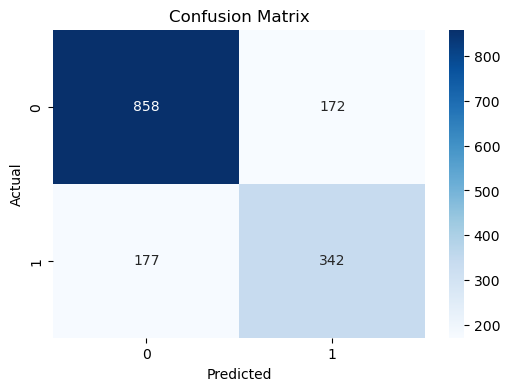

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1030
           1       0.67      0.66      0.66       519

    accuracy                           0.77      1549
   macro avg       0.75      0.75      0.75      1549
weighted avg       0.77      0.77      0.77      1549

Accuracy :  0.7746933505487411



In [214]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

def plot_confusion_matrix(model, xtest, ytest):
    ypred = model.predict(xtest)
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    plt.show()

rf_model = RandomForestClassifier()
dc_model = DecisionTreeClassifier()
kn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lc_model = LogisticRegression()

models = [lc_model]

for model in models:
    model.fit(xtrain, ytrain)

    print('Models', model.__class__.__name__)
    print()
    ypred = model.predict(xtest)

    plot_confusion_matrix(model, xtest, ytest)
    probabilities = model.predict_proba(xtrain)[:, 1]  # Mengambil probabilitas kelas "1" (churn)

    xtrain['probabilities'] = [round(x * 100,2) for x in probabilities]

    print('Classification Report : \n', classification_report(ytest, ypred))
    print('Accuracy : ', accuracy_score(ytest, ypred))
    print()

In [215]:
# model = LogisticRegression()
# model.fit(xtrain, ytrain)

# # Prediksi probabilitas churn pada data uji
# probabilities = model.predict_proba(xtrain)[:, 1]  # Mengambil probabilitas kelas "1" (churn)

# xtrain['probabilities'] = [round(x * 100,2) for x in probabilities]

In [216]:
xtrain[xtrain['probabilities'] > 50]

,0,1,2,3,4,5,6,7,8,9,probabilities
1,0.817413,1.0,0.0,0.000000,0.0,0.408451,0.336655,1.0,0.0,0.0,59.13
4,0.303483,1.0,0.0,0.000000,0.0,0.169014,0.070921,0.0,0.0,0.0,51.57
12,0.604160,1.0,0.0,0.666667,0.0,0.028169,0.025918,0.0,0.0,0.0,76.25
17,0.615920,1.0,0.0,0.000000,0.0,0.394366,0.259226,0.0,0.0,0.0,61.99
19,0.511940,0.0,0.0,0.000000,0.0,0.000000,0.005874,0.0,0.0,0.0,69.89
...,...,...,...,...,...,...,...,...,...,...,...
6185,0.532836,1.0,1.0,0.000000,0.0,0.211268,0.132587,0.0,0.0,0.0,66.04
6186,0.565672,1.0,0.0,0.000000,0.0,0.084507,0.061637,0.0,0.0,0.0,73.41
6188,0.761194,1.0,1.0,0.666667,0.0,0.309859,0.262497,0.0,0.0,0.0,74.62
6190,0.801990,1.0,0.0,0.333333,0.0,0.436620,0.360847,0.0,0.0,0.0,72.17


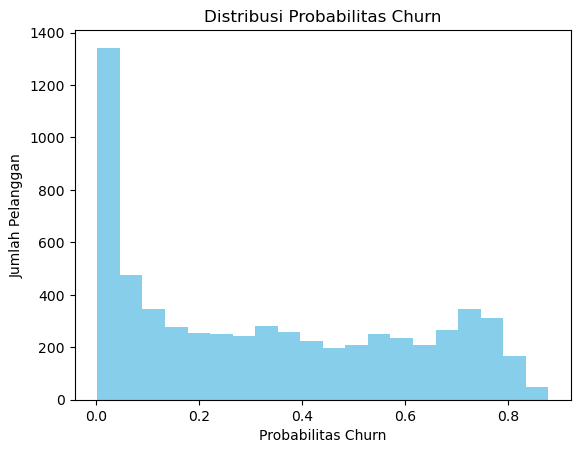

In [217]:
plt.hist(probabilities, bins=20, color='skyblue')
plt.xlabel('Probabilitas Churn')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Probabilitas Churn')
plt.show()

In [218]:
# Misalkan actual_churn adalah array yang berisi data churn aktual (1 untuk churn, 0 untuk tidak churn)
# Bandingkan actual_churn dengan probabilitas churn menggunakan ambang keputusan
threshold = 0.5  # Ambang keputusan

predicted_churn = [1 if prob >= threshold else 0 for prob in probabilities]

# Hitung akurasi
correct_predictions = [1 for actual, predicted in zip(ytrain, predicted_churn) if actual == predicted]
accuracy = len(correct_predictions) / len(ytrain)
accuracy



0.7825665859564165

In [219]:
# Analisis faktor-faktor penyebab churn dengan melihat fitur-fitur penting
feature_importances = model.coef_[0]  # Mengambil koefisien model (hanya berlaku untuk regresi logistik)

# Misalkan df adalah DataFrame yang berisi data pelanggan baru
feature_names = selected_columns  # Nama-nama fitur

# Menghubungkan fitur dengan koefisien
feature_importance_dict = {feature: coef for feature, coef in zip(feature_names, feature_importances)}

# Menampilkan fitur-fitur yang memiliki pengaruh besar pada probabilitas churn
important_features = {k: v for k, v in feature_importance_dict.items() if v > 0.0}
print("Fitur Penting:", important_features)


Fitur Penting: {'monthlycharges': 2.7606306179707905, 'paperlessbilling': 0.20464034594572317, 'seniorcitizen': 0.02292042331469352, 'totalcharges': 1.0633328157176036}


In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_baru = pd.DataFrame({
    'monthlycharges': [100.0],
    'paperlessbilling': [1],  # Contoh: 1 untuk "Yes", 0 untuk "No"
    'seniorcitizen': [0],
    'paymentmethod': [3],  # Contoh: 2 untuk "Electronic check", sesuaikan dengan kode yang sesuai
    'contract': [0],  # Contoh: 0 untuk "Month-to-month", 1 untuk "One year", dsb.
    'tenure': [10],
    'totalcharges': [2400.0],
    'onlinesecurity': [1],  # Contoh: 1 untuk "Yes", 0 untuk "No"
    'techsupport': [0],  # Contoh: 0 untuk "No", 1 untuk "Yes"
    'dependents': [0]  # Contoh: 0 untuk "No", 1 untuk "Yes"
})

data_baru = scaler.fit_transform(data_baru)  # Jika Anda menggunakan normalisasi

# Prediksi probabilitas churn pada data baru
probabilitas_churn = model.predict_proba(data_baru)[:, 1]

# Tampilkan probabilitas churn
print("Probabilitas Churn:", probabilitas_churn)

Probabilitas Churn: [0.35951522]
